# Mood-Based Playlist Generator: A Music Recommendation System

* Build a playlist recommendation system that suggests songs based on mood categories
* Use clustering models to group songs by mood, leveraging acoustic features (valence, energy, tempo).
* Personalize playlists by allowing users to input their mood, and get dynamic song recommendations.

# Business Understanding

Problem: 

Music is deeply tied to human emotions, and listeners often seek songs that match their mood—whether to amplify excitement, provide comfort, or help them focus. However, traditional music recommendation systems, like Spotify’s, primarily rely on genre, artist similarity, or collaborative filtering, which suggests songs based on user listening history. While effective, this approach misses the emotional nuance of music, making it harder for users to discover songs that truly match their current mood.

This project addresses that gap by developing a Mood-Based Playlist Generator, which categorizes songs based on their emotional and acoustic characteristics rather than just past user behavior. By analyzing features such as valence, energy, and tempo, this system creates personalized playlists that align with how the user feels in the moment, offering a value-add over Spotify’s existing recommendation algorithms.

Stakeholders and Use Cases

This project can benefit multiple stakeholders across the music and entertainment industries:
- Music Listeners – Users who want personalized, mood-driven playlists can use this system to discover new songs that fit their emotional state rather than just similar artists.

Value Proposition
The Mood-Based Playlist Generator provides a data-driven solution to emotional music selection, filling a key gap in Spotify’s recommendation model. By clustering songs based on mood rather than just popularity or listening history, this system:
- Helps users quickly find songs that match their mood without relying on pre-made editorial playlists
- Improves personalized music discovery beyond traditional collaborative filtering

By offering a fresh way to discover music based on mood, this project enhances both user experience and engagement, making music consumption more intuitive and emotionally fulfilling compared to existing recommendation systems.

I will use cosine similarity score. How similar data points are within a cluster (angle-based)	Use when data is high-dimensional and direction matters (like text, embeddings, or music features)	Closer to 1 (best)

 
 	
Notebook clearly explains the value for a specific stakeholder, including:
- Introduction explains the real-world problem the project aims to solve
- Introduction identifies stakeholders who could use the project and how they would use it
- Conclusion summarizes implications of the project for the real-world problem and stakeholders 

# Data Understanding

 Describe the data sources and explain why the data are suitable for the project
- Present the size of the dataset and descriptive statistics for all features used in the analysis
- Justify the inclusion of features based on their properties and relevance for the project
- Identify any limitations of the data that have implications for the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# Suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning) 

In [2]:
df=pd.read_csv('./spotify_songs.csv')
df

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date,in_top_tracks
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.026100,0.000011,0.3560,0.5030,117.906,210133,4.0,1999,1999-11-02,0
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.012900,0.000071,0.1550,0.4890,103.680,206200,4.0,1999,1999-11-02,0
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.023400,0.000002,0.1220,0.3700,149.749,298893,4.0,1999,1999-11-02,0
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.163000,0.000004,0.1210,0.5740,96.752,213640,4.0,1999,1999-11-02,0
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.001620,0.105000,0.0789,0.5390,127.059,205600,4.0,1999,1999-11-02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202896,4gVc1fgR0NksE2w6OlUjRh,Teeth of Frost,Into the Cryosphere,3jsJegcKkbezKeJwj7xcfE,['The Howling Wind'],['2cVlQgVDrQvxEZNbvwsAjR'],2,1,False,0.113,...,0.000001,0.844000,0.1170,0.1560,153.031,334480,4.0,2010,2010-04-27,0
202897,6vqiNsqJIXD5XGmKUSJ6Wv,Obscured Pyramid,Into the Cryosphere,3jsJegcKkbezKeJwj7xcfE,['The Howling Wind'],['2cVlQgVDrQvxEZNbvwsAjR'],3,1,False,0.156,...,0.486000,0.539000,0.3300,0.1230,85.661,92947,5.0,2010,2010-04-27,0
202898,1bINDW0Aub6GXpjsCqTCeJ,Ice Cracking in the Abyss,Into the Cryosphere,3jsJegcKkbezKeJwj7xcfE,['The Howling Wind'],['2cVlQgVDrQvxEZNbvwsAjR'],4,1,False,0.101,...,0.000002,0.841000,0.0766,0.1270,158.450,231373,4.0,2010,2010-04-27,0
202899,2IgGF8jzi1YsdpvK9yTxWF,Will Is the Only Fire Under an Avalanche,Into the Cryosphere,3jsJegcKkbezKeJwj7xcfE,['The Howling Wind'],['2cVlQgVDrQvxEZNbvwsAjR'],5,1,False,0.129,...,0.000012,0.826000,0.1160,0.2580,145.381,415587,4.0,2010,2010-04-27,0


In [3]:
df.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date', 'in_top_tracks'],
      dtype='object')

In [4]:
df.shape

(202901, 25)

In [5]:
df.describe()

,track_number,disc_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,in_top_tracks
count,202901.000000,202901.000000,202901.000000,202901.000000,202901.000000,202901.000000,202901.000000,202901.000000,202901.00000,202901.000000,202901.000000,202901.000000,202901.000000,2.029010e+05,202901.000000,202901.000000,202901.00000
mean,7.553127,1.037654,0.489927,0.515870,5.213966,-11.709972,0.681993,0.081485,0.43975,0.289357,0.201269,0.433823,117.841706,2.494048e+05,3.829794,2003.767788,0.00002
std,5.578483,0.236580,0.185813,0.293075,3.531297,6.725615,0.465703,0.116412,0.38365,0.377455,0.181159,0.270260,30.986910,1.505563e+05,0.570314,8.948875,0.00444
min,1.000000,1.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+03,0.000000,1909.000000,0.00000
25%,3.000000,1.000000,0.356000,0.262000,2.000000,-14.934000,0.000000,0.034500,0.03450,0.000012,0.096700,0.197000,94.703000,1.770400e+05,4.000000,2000.000000,0.00000
50%,7.000000,1.000000,0.497000,0.528000,5.000000,-9.863000,1.000000,0.043700,0.37500,0.011300,0.124000,0.412000,116.767000,2.282930e+05,4.000000,2005.000000,0.00000
75%,10.000000,1.000000,0.627000,0.774000,8.000000,-6.856000,1.000000,0.068600,0.85000,0.730000,0.244000,0.651000,137.065000,2.887550e+05,4.000000,2008.000000,0.00000
max,50.000000,9.000000,0.990000,1.000000,11.000000,4.651000,1.000000,0.969000,0.99600,1.000000,1.000000,1.000000,246.130000,6.054655e+06,5.000000,2020.000000,1.00000


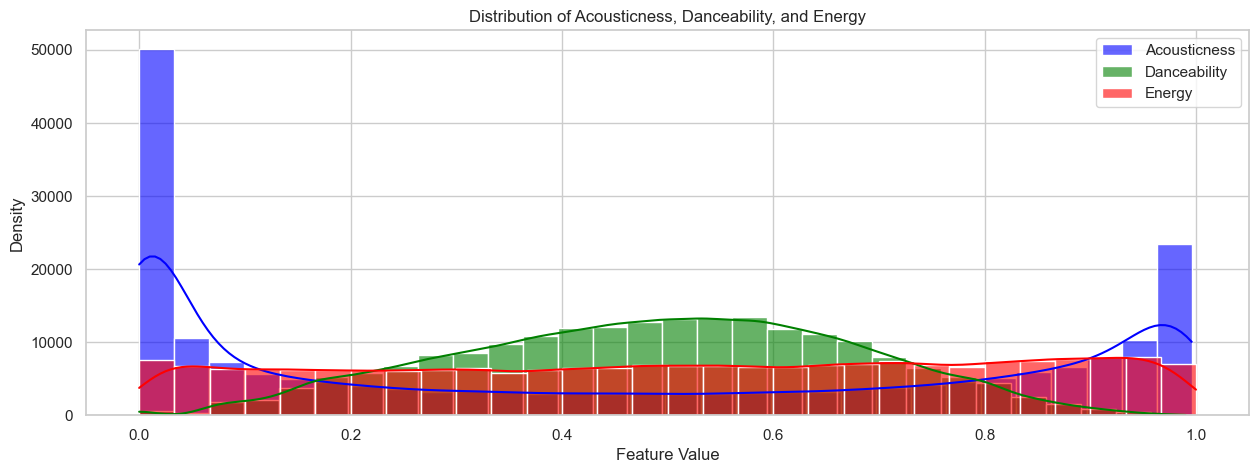

In [6]:
# Set visualization style
sns.set(style="whitegrid")

# Plot distributions
plt.figure(figsize=(15, 5))
sns.histplot(df["acousticness"], bins=30, kde=True, color="blue", label="Acousticness", alpha=0.6)
sns.histplot(df["danceability"], bins=30, kde=True, color="green", label="Danceability", alpha=0.6)
sns.histplot(df["energy"], bins=30, kde=True, color="red", label="Energy", alpha=0.6)
plt.legend()
plt.title("Distribution of Acousticness, Danceability, and Energy")
plt.xlabel("Feature Value")
plt.ylabel("Density")
plt.show()

### Visualize Distribution of Artists and Songs

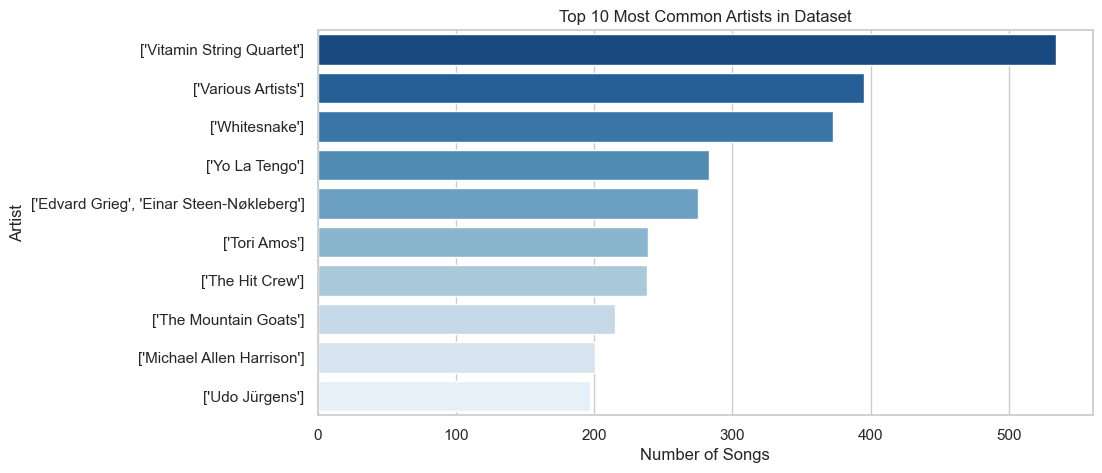

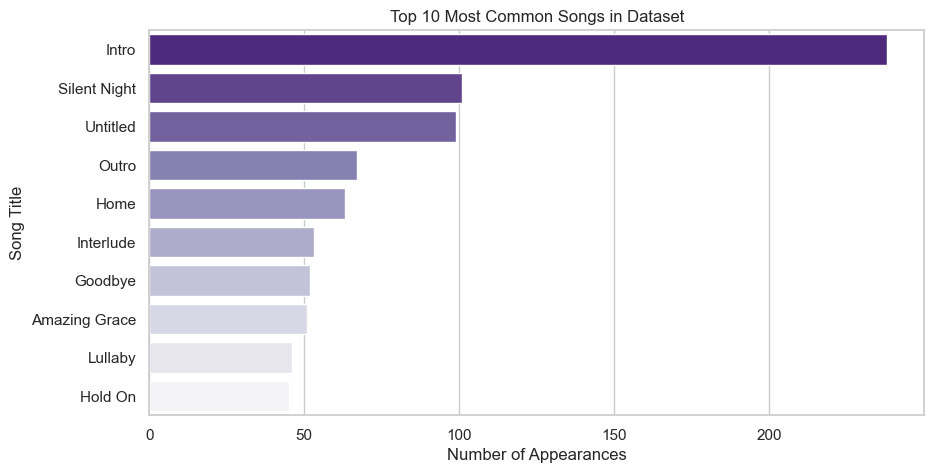

In [7]:
# Count top 10 most common artists
top_artists = df["artists"].value_counts().head(10)

# Count top 10 most common songs
top_songs = df["name"].value_counts().head(10)

# Plot top 10 artists
plt.figure(figsize=(10, 5))
sns.barplot(y=top_artists.index, x=top_artists.values, palette="Blues_r")
plt.title("Top 10 Most Common Artists in Dataset")
plt.xlabel("Number of Songs")
plt.ylabel("Artist")
plt.show()

# Plot top 10 songs
plt.figure(figsize=(10, 5))
sns.barplot(y=top_songs.index, x=top_songs.values, palette="Purples_r")
plt.title("Top 10 Most Common Songs in Dataset")
plt.xlabel("Number of Appearances")
plt.ylabel("Song Title")
plt.show()


# Data Preparation

- Instructions or code needed to get and prepare the raw data for analysis
- Code comments and text to explain what your data preparation code does
- Valid justifications for why the steps you took are appropriate for the problem you are solving

### Drop Unnamed, Target, Mode, Duration and columns

In [8]:
# Drop Unnamed and Target columns
df = df.drop(columns=["duration_ms"], errors="ignore")

### Correlation between features

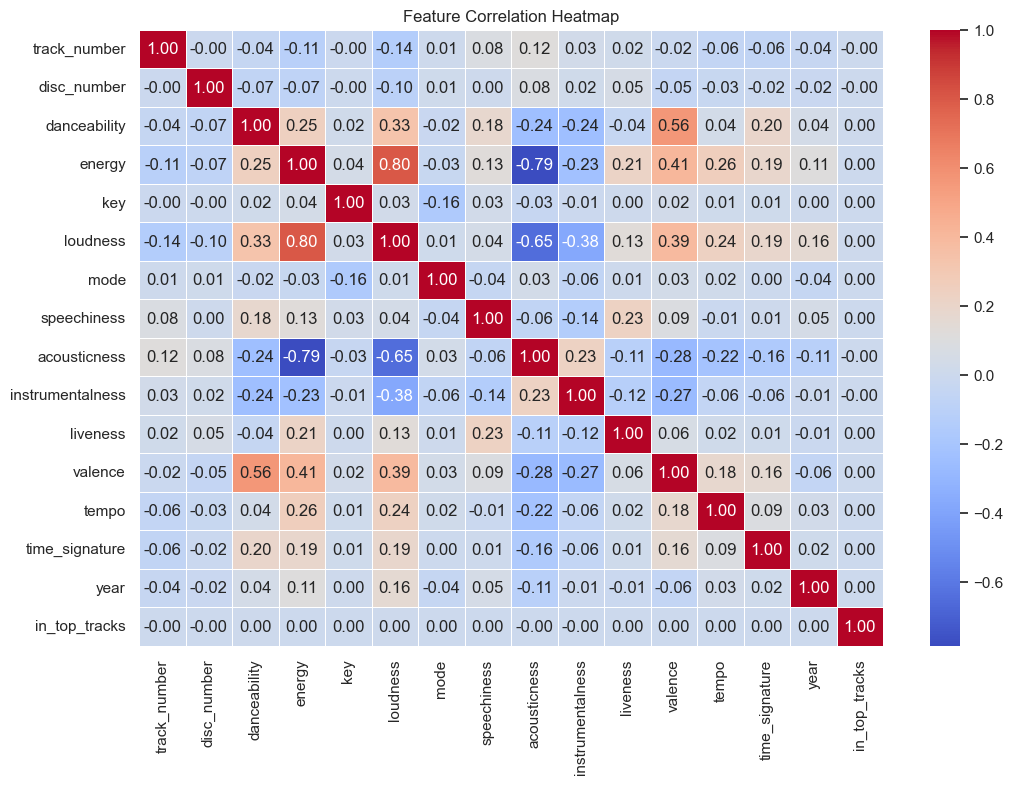

In [9]:
# Exclude "Unnamed: 0" and select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### Drop Energy column
Since energy and loudness are highly correlated and energy and acousticness are highly correlated, I will drop energy as we are already getting similar information from the other features.

In [10]:
# Drop energy
df = df.drop(columns=["energy"], errors="ignore")

### Check for null values

In [11]:
# Check for missing values
df.isnull().sum()

id                  0
name                0
album               0
album_id            0
artists             0
artist_ids          0
track_number        0
disc_number         0
explicit            0
danceability        0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
year                0
release_date        0
in_top_tracks       0
dtype: int64

In [12]:
# Drop rows with any null values
df.dropna(inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())

id                  0
name                0
album               0
album_id            0
artists             0
artist_ids          0
track_number        0
disc_number         0
explicit            0
danceability        0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
year                0
release_date        0
in_top_tracks       0
dtype: int64


### Drop duplicate songs
It looks like there are some duplicate songs in the data set. We will keep only one version if it has the same title and artist.

In [13]:
# Drop duplicate songs/ remixes
df = df.drop_duplicates(subset=["name", "artists"], keep="first").reset_index(drop=True)

In [14]:
#Check if there are any more duplicates
df.duplicated(subset=["name", "artists"], keep=False).sum()

0

In [15]:
df.shape

(199336, 23)

### Select only the features we will use for clustering

In [16]:
df.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'year',
       'release_date', 'in_top_tracks'],
      dtype='object')

Features to Exclude
Metadata like id, name, album, artist_ids, release_date (Not useful for clustering).
Track structure details (track_number, disc_number) (Not indicative of song similarity).
Explicit content (explicit) (Doesn't indicate musical similarity).
Key & Mode (Not always helpful in clustering since many songs share the same key).

In [17]:
# Select relevant features for clustering
feature_cols = ['danceability', 'valence', 'tempo', 'acousticness',
                'instrumentalness', 'liveness', 'speechiness', 'loudness']

### Separate into liked and unheard songs

In [18]:
# Separate liked and unheard songs
liked_songs = df[df['in_top_tracks'] == 1]
unheard_songs = df[df['in_top_tracks'] == 0]

### Reduce Sample from 200K to 50K Unheard Songs to Improve Speed

In [19]:
sampled_unheard_songs = unheard_songs.sample(n=50000, random_state=42) if len(unheard_songs) > 50000 else unheard_songs
data_for_clustering = pd.concat([liked_songs, sampled_unheard_songs])

### Scale features

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data_for_clustering = pd.concat([liked_songs, sampled_unheard_songs])

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data_for_clustering[feature_cols])

In [21]:
df_scaled.shape

(50004, 8)

# Modeling

Explain modeling

### Finding Optimal Number of Clusters for KMeans

k=2, Inertia=307814.1991837009
k=3, Inertia=276220.8864840329
k=4, Inertia=248432.3250300183
k=5, Inertia=227729.4064150637
k=6, Inertia=204302.95525405934
k=7, Inertia=186877.2871130957
k=8, Inertia=178521.17112111152
k=9, Inertia=168970.5371555087
k=10, Inertia=162610.3964207281


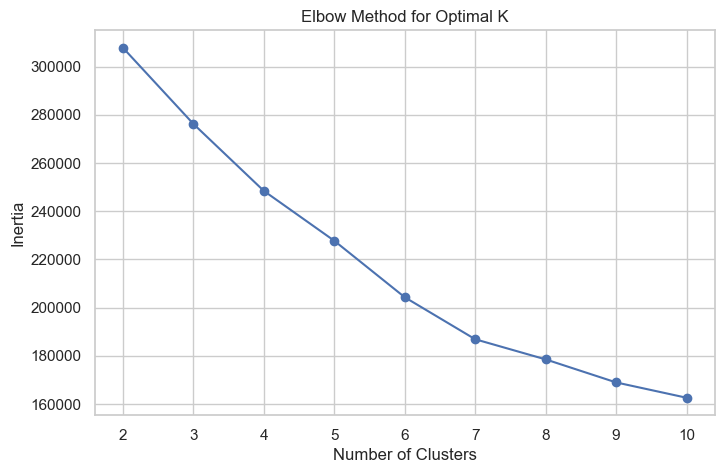

In [22]:
# Determine optimal number of clusters using Elbow method
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto', algorithm='elkan')
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    print(f'k={k}, Inertia={kmeans.inertia_}')  # Print inertia values

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### KMeans - 6 clusters

In [23]:
# Set optimal k
optimal_k = 6

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans.fit_predict(df_scaled)

### Function to Evaluate Clustering (Compute Silhouette & Cosine Similarity Scores)

In [24]:
def evaluate_clustering(df_scaled, cluster_labels, cluster_centers, sample_size=2000):
    """
    Calculate the Silhouette Score and Cosine Similarity Score for clustering results.
    
    Parameters:
    - df_scaled: Scaled feature matrix (numpy array)
    - cluster_labels: Cluster assignments for each song
    - cluster_centers: Centroids of the clusters
    - sample_size: Number of samples for Silhouette Score computation (default=2000)
    
    Returns:
    - silhouette_avg: Average Silhouette Score (computed on a sample)
    - avg_cosine_similarity: Average Cosine Similarity Score (computed in bulk)
    """

    # Compute Silhouette Score on a smaller sample for efficiency
    if len(set(cluster_labels)) > 1:
        sample_size = min(sample_size, len(df_scaled))  # Ensure sample is within dataset size
        sample_indices = np.random.choice(len(df_scaled), size=sample_size, replace=False)
        silhouette_avg = silhouette_score(df_scaled[sample_indices], cluster_labels[sample_indices])
    else:
        silhouette_avg = None  # Silhouette is not defined for a single cluster

    # Compute Cosine Similarity in bulk (no looping)
    cosine_matrix = cosine_similarity(df_scaled, cluster_centers)
    
    # Get max similarity score for each song (closest centroid)
    avg_cosine_similarity = np.mean(np.max(cosine_matrix, axis=1))

    return silhouette_avg, avg_cosine_similarity

### Evaluate KMeans - 6 clusters

In [25]:
silhouette_score_kmeans, cosine_similarity_kmeans = evaluate_clustering(
    df_scaled,  # Use df_scaled instead of data_scaled
    data_for_clustering['kmeans_cluster'].values,
    kmeans.cluster_centers_
)

print(f"Silhouette Score for K-Means: {silhouette_score_kmeans:.4f}")
print(f"Cosine Similarity Score for K-Means: {cosine_similarity_kmeans:.4f}")

Silhouette Score for K-Means: 0.1736
Cosine Similarity Score for K-Means: 0.6607


In [26]:
# Initialize a results list if it doesn't exist
try:
    clustering_results
except NameError:
    clustering_results = []

# Store results for Kmeans:6 
kmeans_results_6 = {
    "Method": "K-Means",
    "Optimal k": optimal_k,
    "Silhouette Score": silhouette_score_kmeans,
    "Average Cosine Similarity": cosine_similarity_kmeans
}

# Append results to the list
clustering_results.append(kmeans_results_6)

### KMeans - 7 clusters

In [27]:
# Set optimal k
optimal_k = 7

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans.fit_predict(df_scaled)

In [28]:
# Evaluate
silhouette_score_kmeans, cosine_similarity_kmeans = evaluate_clustering(
    df_scaled, 
    data_for_clustering['kmeans_cluster'].values, 
    kmeans.cluster_centers_
)

print(f"Silhouette Score for K-Means: {silhouette_score_kmeans:.4f}")
print(f"Cosine Similarity Score for K-Means: {cosine_similarity_kmeans:.4f}")

Silhouette Score for K-Means: 0.1962
Cosine Similarity Score for K-Means: 0.7166


In [29]:
# Store results for Kmeans: 7
kmeans_results_7 = {
    "Method": "K-Means",
    "Optimal k": optimal_k,
    "Silhouette Score": silhouette_score_kmeans,
    "Average Cosine Similarity": cosine_similarity_kmeans
}

# Append results to the list
clustering_results.append(kmeans_results_7)

### Try Gaissian Mixture Models (GMM) instead of KMeans
The lower the BIC the better the model

In [30]:
for k in range(3, 30):  # Test from 3 to 20 clusters
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(df_scaled)
    print(f"k={k}, BIC: {gmm.bic(df_scaled)}")

k=3, BIC: 848210.2615047448
k=4, BIC: 691729.4733451147
k=5, BIC: 670678.760890812
k=6, BIC: 630237.1288860723
k=7, BIC: 592948.3621010851
k=8, BIC: 571573.3207352607
k=9, BIC: 566622.7540184745
k=10, BIC: 550825.947540252
k=11, BIC: 546411.7659607286
k=12, BIC: 535028.418450104
k=13, BIC: 532166.4318824852
k=14, BIC: 526450.8392131277
k=15, BIC: 516656.5360395451
k=16, BIC: 515538.11860184907
k=17, BIC: 508017.0145269096
k=18, BIC: 502041.4855329246
k=19, BIC: 497916.1307283793
k=20, BIC: 494158.3521455596
k=21, BIC: 491336.4569323881
k=22, BIC: 490334.0010543072
k=23, BIC: 489428.8785518172
k=24, BIC: 485180.7495806199
k=25, BIC: 481276.2230791316
k=26, BIC: 480077.2526664664
k=27, BIC: 476550.00458410574
k=28, BIC: 474609.9623724112
k=29, BIC: 476274.9759319313


In [31]:
# Store BIC values
bic_scores = {}

# Test different cluster numbers
for k in range(3, 30):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(df_scaled)
    bic = gmm.bic(df_scaled)
    bic_scores[k] = bic  # Store BIC for each k

# Find the k with the lowest BIC
optimal_k = min(bic_scores, key=bic_scores.get)
best_bic = bic_scores[optimal_k]

# Print only the best k and BIC score
print(f"Optimal k={optimal_k}, Lowest BIC: {best_bic:.4f}")

Optimal k=28, Lowest BIC: 474609.9624


In [32]:
# Fit GMM with the optimal number of clusters
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
labels = gmm.fit_predict(df_scaled)

# GMM cluster "centers" are the means of each Gaussian component
cluster_centers = gmm.means_

# Evaluate clustering performance using your function
silhouette_avg, avg_cosine_similarity = evaluate_clustering(df_scaled, labels, cluster_centers)

# Display results
print(f"Optimal k={optimal_k}")
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Average Cosine Similarity: {avg_cosine_similarity:.4f}")

Optimal k=28
Silhouette Score: -0.0745
Average Cosine Similarity: 0.7733


#### Store results

In [33]:
# Store results for GMM
gmm_results = {
    "Method": "GMM",
    "Optimal k": optimal_k,
    "Silhouette Score": silhouette_avg,
    "Average Cosine Similarity": avg_cosine_similarity
}

# Append results to the list
clustering_results.append(gmm_results)

### Try Agglomerative Clustering instead of KMeans
Need to do a sample or else it would take too long

In [34]:
# Sample dataset for Agglomerative Clustering
sample_size = min(10000, len(df_scaled))
df_scaled_sample = df_scaled[np.random.choice(len(df_scaled), size=sample_size, replace=False)]

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=6, linkage='ward')
agg_labels = agg_clustering.fit_predict(df_scaled_sample)

# Evaluate Agglomerative Clustering using the same function
silhouette_score_agg, cosine_similarity_agg = evaluate_clustering(
    df_scaled_sample, 
    agg_labels,  # Cluster labels
    cluster_centers=None  # No predefined centroids, function will estimate them
)

print(f"Silhouette Score for Agglomerative Clustering: {silhouette_score_agg:.4f}")
print(f"Cosine Similarity Score for Agglomerative Clustering: {cosine_similarity_agg:.4f}")

Silhouette Score for Agglomerative Clustering: 0.1688
Cosine Similarity Score for Agglomerative Clustering: 1.0000


### Evaluating different linkage methods

In [35]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, pairwise_distances
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Set the number of clusters to 6
optimal_k = 6

# List of linkage methods to test
linkage_methods = ['ward', 'complete', 'average', 'single']
silhouette_scores = {}
cosine_similarities = {}

# Reduce dataset size for hierarchical clustering (optional)
sample_size = min(10000, len(df_scaled))
df_scaled_sample = df_scaled[np.random.choice(len(df_scaled), size=sample_size, replace=False)]

# Try different linkage methods and compute Silhouette Score & Cosine Similarity
for linkage in linkage_methods:
    agg_clustering = AgglomerativeClustering(n_clusters=optimal_k, linkage=linkage)
    agg_labels = agg_clustering.fit_predict(df_scaled_sample)
    
    # Compute Silhouette Score
    silhouette = silhouette_score(df_scaled_sample, agg_labels)
    silhouette_scores[linkage] = silhouette

    # Compute cluster centroids manually (mean of points in each cluster)
    unique_clusters = np.unique(agg_labels)
    cluster_centers = np.array([df_scaled_sample[agg_labels == cluster].mean(axis=0) for cluster in unique_clusters])

    # Compute Cosine Similarity between data points and estimated centroids
    cosine_matrix = cosine_similarity(df_scaled_sample, cluster_centers)
    avg_cosine_similarity = np.mean(np.max(cosine_matrix, axis=1))
    cosine_similarities[linkage] = avg_cosine_similarity

    print(f"Linkage: {linkage}, Silhouette Score: {silhouette:.4f}, Cosine Similarity: {avg_cosine_similarity:.4f}")

# Find the best linkage method based on Silhouette Score
best_linkage = max(silhouette_scores, key=silhouette_scores.get)
best_silhouette = silhouette_scores[best_linkage]
best_cosine_similarity = cosine_similarities[best_linkage]

print(f"\nBest linkage method: {best_linkage}")
print(f"Best Silhouette Score: {best_silhouette:.4f}")
print(f"Best Cosine Similarity: {best_cosine_similarity:.4f}")


Linkage: ward, Silhouette Score: 0.1605, Cosine Similarity: 0.6794
Linkage: complete, Silhouette Score: 0.2257, Cosine Similarity: 0.5995
Linkage: average, Silhouette Score: 0.2644, Cosine Similarity: 0.3889
Linkage: single, Silhouette Score: 0.2340, Cosine Similarity: 0.2841

Best linkage method: average
Best Silhouette Score: 0.2644
Best Cosine Similarity: 0.3889


In [36]:
# Store results for Agglomerative clustering
agg_results_6 = {
    "Method": "Agglomerative Clustering",
    "Optimal k": optimal_k,
    "Silhouette Score": best_silhouette,
    "Average Cosine Similarity": best_cosine_similarity
}

# Append results to the list
clustering_results.append(agg_results_6)

### Try DBSCAN (Density-Based Clustering)

In [37]:
from sklearn.cluster import DBSCAN

# Set DBSCAN parameters
eps_value = 0.5  # Adjust this value to find the best clustering
min_samples_value = 10  # Minimum points to form a cluster

# Apply DBSCAN
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value, metric='euclidean')
dbscan_labels = dbscan.fit_predict(df_scaled_sample)

# Count the number of clusters (excluding noise points labeled as -1)
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
num_noise = list(dbscan_labels).count(-1)

print(f"DBSCAN found {num_clusters} clusters and {num_noise} noise points.")

# Compute Silhouette Score (only if DBSCAN found at least 2 clusters)
if num_clusters > 1:
    silhouette_score_dbscan = silhouette_score(df_scaled_sample, dbscan_labels)
    print(f"Silhouette Score for DBSCAN: {silhouette_score_dbscan:.4f}")
else:
    print("DBSCAN found too few clusters to compute Silhouette Score.")

DBSCAN found 13 clusters and 8998 noise points.
Silhouette Score for DBSCAN: -0.3912


###  Increase eps (Neighborhood Radius)
Since 90% of songs are noise, try a larger eps value to capture more points in clusters.

In [38]:
for eps in [0.7, 1.0, 1.5, 2.0]:  # Test larger values
    dbscan = DBSCAN(eps=eps, min_samples=10, metric='euclidean')
    labels = dbscan.fit_predict(df_scaled_sample)
    num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    num_noise = list(labels).count(-1)

    if num_clusters > 1:
        silhouette = silhouette_score(df_scaled_sample, labels)
        print(f"eps={eps}, Clusters={num_clusters}, Noise={num_noise}, Silhouette Score={silhouette:.4f}")

eps=0.7, Clusters=9, Noise=5072, Silhouette Score=-0.2274
eps=1.0, Clusters=5, Noise=1636, Silhouette Score=0.0196
eps=1.5, Clusters=3, Noise=314, Silhouette Score=0.3762
eps=2.0, Clusters=2, Noise=56, Silhouette Score=0.3393


### PCA
We'll reduce the dataset to 6 principal components (PCs) to keep most of the variance.

In [39]:
df_scaled.shape

(50004, 8)

In [40]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions
pca = PCA(n_components=6)  # Reduce to 6 dimensions
df_scaled_pca = pca.fit_transform(df_scaled)

# Check how much variance is retained
explained_variance = sum(pca.explained_variance_ratio_)
print(f"Total Variance Retained: {explained_variance:.4f}")

Total Variance Retained: 0.9108


In [41]:
df_scaled_pca.shape

(50004, 6)

### KMeans on PCA Data

k=4, Inertia=208501.92583019854
k=5, Inertia=185269.23269358446
k=6, Inertia=167869.86186039043
k=7, Inertia=155516.6300123024
k=8, Inertia=142819.0386077352
k=9, Inertia=138670.4766170561
k=10, Inertia=129518.880544975
k=11, Inertia=122586.25884720281
k=12, Inertia=114157.96040419108
k=13, Inertia=110100.89500361856
k=14, Inertia=107340.2423008146
k=15, Inertia=103575.58483744548
k=16, Inertia=100332.92934700407
k=17, Inertia=98394.66740021567
k=18, Inertia=95953.15707046587
k=19, Inertia=94493.57243188766


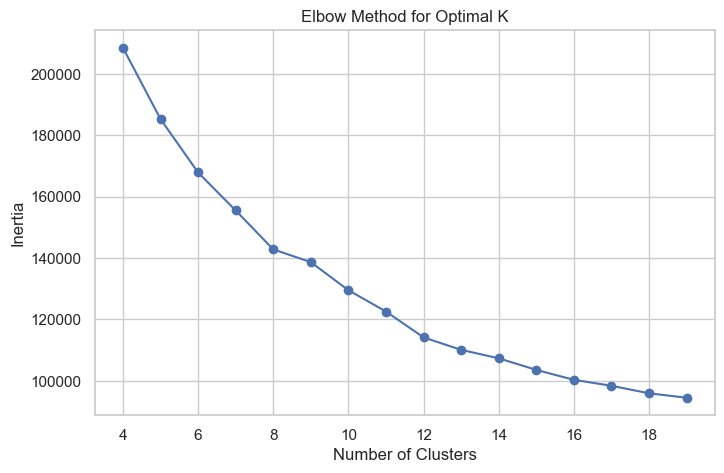

In [42]:
# Determine optimal number of clusters using Elbow method
inertia = []
k_range = range(4, 20)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto', algorithm='elkan')
    kmeans.fit(df_scaled_pca)
    inertia.append(kmeans.inertia_)
    print(f'k={k}, Inertia={kmeans.inertia_}')  # Print inertia values

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [62]:
# Apply K-Means 7 clusters
kmeans_7 = KMeans(n_clusters=7, random_state=42)
kmeans_labels_7 = kmeans.fit_predict(df_scaled_pca)

In [63]:
silhouette_score_kmeans, cosine_similarity_kmeans = evaluate_clustering(
    df_scaled_pca,
    data_for_clustering['kmeans_cluster'].values,
    kmeans.cluster_centers_
)

print(f"Silhouette Score for K-Means: {silhouette_score_kmeans:.4f}")
print(f"Cosine Similarity Score for K-Means: {cosine_similarity_kmeans:.4f}")

Silhouette Score for K-Means: 0.2222
Cosine Similarity Score for K-Means: 0.7505


In [45]:
# Store results

kmeans_pca_7 = {
    "Method": "PCA KMeans",
    "Optimal k": optimal_k,
    "Silhouette Score": silhouette_score_kmeans,
    "Average Cosine Similarity": cosine_similarity_kmeans
}

# Append results to the list
clustering_results.append(kmeans_pca_7)

### GMM on PCA Data

In [50]:
gmm = GaussianMixture(n_components=k, random_state=42)  # Make sure 'k' is defined
gmm.fit(df_scaled_pca)
gmm_labels = gmm.predict(df_scaled_pca)  # Get cluster labels

In [53]:
# Compute cluster centers manually by averaging points in each cluster
unique_labels = np.unique(gmm_labels)
gmm_cluster_centers_pca = np.array([
    df_scaled_pca[gmm_labels == label].mean(axis=0) for label in unique_labels
])

In [54]:
# Evaluate GMM clustering on PCA-transformed data
silhouette_gmm_pca, avg_cosine_similarity_gmm_pca = evaluate_clustering(
    df_scaled_pca, gmm_labels, gmm_cluster_centers_pca
)

# Display results
print(f"GMM on PCA: Silhouette Score = {silhouette_gmm_pca:.4f}")
print(f"GMM on PCA: Average Cosine Similarity = {avg_cosine_similarity_gmm_pca:.4f}")

GMM on PCA: Silhouette Score = -0.0001
GMM on PCA: Average Cosine Similarity = 0.8057


In [51]:
# check number of clusters used
numclusters = len(unique_labels)
print(f"Number of clusters used: {num_clusters}")

Number of clusters used: 2


In [55]:
# Store results

gmm_pca = {
    "Method": "PCA GMM",
    "Optimal k": numclusters,
    "Silhouette Score": silhouette_gmm_pca,
    "Average Cosine Similarity": avg_cosine_similarity_gmm_pca
}

# Append results to the list
clustering_results.append(gmm_pca)

### Agglomerative Clustering on PCA Data.

In [56]:
# Reduce sample size
sample_indices = np.random.choice(df_scaled_pca.shape[0], int(0.3 * df_scaled_pca.shape[0]), replace=False)
df_sampled = df_scaled_pca[sample_indices]

# Define k values to test
k_values = range(5, 11)
linkage_method = 'ward'

# Store results
silhouette_results = {}
cosine_results = {}

# Loop through different cluster numbers
for k in k_values:
    try:
        # Apply Agglomerative Clustering
        agg_clustering = AgglomerativeClustering(n_clusters=k, linkage=linkage_method)
        agg_labels = agg_clustering.fit_predict(df_sampled)

        # Compute Silhouette Score
        silhouette = silhouette_score(df_sampled, agg_labels)
        silhouette_results[k] = silhouette

        # Compute Cosine Similarity Score
        unique_clusters = np.unique(agg_labels)
        cluster_centers = np.array([df_sampled[agg_labels == cluster].mean(axis=0) for cluster in unique_clusters])
        cosine_matrix = cosine_similarity(df_sampled, cluster_centers)
        avg_cosine_similarity = np.mean(np.max(cosine_matrix, axis=1))
        cosine_results[k] = avg_cosine_similarity

        print(f"k={k}, Silhouette Score={silhouette:.4f}, Cosine Similarity={avg_cosine_similarity:.4f}")

    except Exception as e:
        print(f"Skipping k={k} due to error: {e}")

# Find the best k values based on highest Silhouette Score and highest Cosine Similarity Score
if silhouette_results:
    best_silhouette_k = max(silhouette_results, key=silhouette_results.get)
    best_silhouette_score = silhouette_results[best_silhouette_k]
    print(f"\nBest Silhouette Score: k={best_silhouette_k}, Score={best_silhouette_score:.4f}")

if cosine_results:
    best_cosine_k = max(cosine_results, key=cosine_results.get)
    best_cosine_score = cosine_results[best_cosine_k]
    print(f"Best Cosine Similarity Score: k={best_cosine_k}, Score={best_cosine_score:.4f}")

k=5, Silhouette Score=0.1797, Cosine Similarity=0.6608
k=6, Silhouette Score=0.1952, Cosine Similarity=0.7163
k=7, Silhouette Score=0.2026, Cosine Similarity=0.7209
k=8, Silhouette Score=0.1527, Cosine Similarity=0.7637
k=9, Silhouette Score=0.1555, Cosine Similarity=0.7802
k=10, Silhouette Score=0.1582, Cosine Similarity=0.8033

Best Silhouette Score: k=7, Score=0.2026
Best Cosine Similarity Score: k=10, Score=0.8033


In [57]:
# Store results
agg_pca = {
    "Method": "PCA Agglomerative Clustering",
    "Optimal k": best_cosine_k,
    "Silhouette Score": silhouette_results.get(best_cosine_k, None),
    "Average Cosine Similarity": best_cosine_score
}

# Append results to the list
clustering_results.append(agg_pca)

In [58]:
clustering_results

[{'Method': 'K-Means (k=6)',
  'Optimal k': 5,
  'Silhouette Score': 0.17363718521180768,
  'Average Cosine Similarity': 0.6606969795485155},
 {'Method': 'K-Means (k=7)',
  'Optimal k': 7,
  'Silhouette Score': 0.19622022664785813,
  'Average Cosine Similarity': 0.7165700828413147},
 {'Method': 'GMM',
  'Optimal k': 28,
  'Silhouette Score': -0.07445723395135213,
  'Average Cosine Similarity': 0.7732715670437088},
 {'Method': 'Agglomerative (k=6)',
  'Optimal k': 6,
  'Silhouette Score': 0.2643501180600416,
  'Average Cosine Similarity': 0.38892890841341116},
 {'Method': 'PCA KMeans (k=7)',
  'Optimal k': 7,
  'Silhouette Score': 0.21866011200136454,
  'Average Cosine Similarity': 0.7505329508411349},
 {'Method': 'GMM',
  'Optimal k': 3,
  'Silhouette Score': -5.8681335225671647e-05,
  'Average Cosine Similarity': 0.80565847418505},
 {'Method': 'Agglomerative Clustering',
  'Optimal k': 10,
  'Silhouette Score': 0.15817956805770506,
  'Average Cosine Similarity': 0.8033499331235858}]

## DBSCAN on PCA Data

In [59]:
# Reduce Sample Size to Prevent Memory Overload
sample_size = min(5000, df_scaled_pca.shape[0])  # Limit dataset size to 5000
df_sampled = df_scaled_pca[np.random.choice(df_scaled_pca.shape[0], sample_size, replace=False)]

# Apply DBSCAN with Cosine Similarity
dbscan = DBSCAN(eps=1.5, min_samples=5, metric='cosine')
dbscan_labels = dbscan.fit_predict(df_sampled)

# Compute Clusters & Noise Points
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
num_noise = list(dbscan_labels).count(-1)

# Compute Silhouette Score Only If More Than 1 Cluster Exists
silhouette_dbscan_pca = silhouette_score(df_sampled, dbscan_labels) if num_clusters > 1 else None

# Print Results
print(f"DBSCAN on PCA Data:")
print(f"- Clusters Found: {num_clusters}")
print(f"- Noise Points: {num_noise}")
print(f"- Silhouette Score: {silhouette_dbscan_pca if silhouette_dbscan_pca is not None else 'N/A'}")

DBSCAN on PCA Data:
- Clusters Found: 1
- Noise Points: 0
- Silhouette Score: N/A


In [60]:
eps_values = [0.3, 0.5, 0.7, 1.0]  # Test smaller eps values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5, metric='cosine')
    dbscan_labels = dbscan.fit_predict(df_sampled)

    num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    num_noise = list(dbscan_labels).count(-1)

    silhouette_dbscan_pca = silhouette_score(df_sampled, dbscan_labels) if num_clusters > 1 else None

    print(f"\nDBSCAN with eps={eps}:")
    print(f"- Clusters Found: {num_clusters}")
    print(f"- Noise Points: {num_noise}")
    print(f"- Silhouette Score: {silhouette_dbscan_pca if silhouette_dbscan_pca is not None else 'N/A'}")


DBSCAN with eps=0.3:
- Clusters Found: 1
- Noise Points: 0
- Silhouette Score: N/A

DBSCAN with eps=0.5:
- Clusters Found: 1
- Noise Points: 0
- Silhouette Score: N/A

DBSCAN with eps=0.7:
- Clusters Found: 1
- Noise Points: 0
- Silhouette Score: N/A

DBSCAN with eps=1.0:
- Clusters Found: 1
- Noise Points: 0
- Silhouette Score: N/A


# Evaluation

### Which model to use

In [61]:
# Convert clustering results list to a DataFrame
df_clustering_results = pd.DataFrame(clustering_results)

df_clustering_results

,Method,Optimal k,Silhouette Score,Average Cosine Similarity
0,K-Means (k=6),5,0.173637,0.660697
1,K-Means (k=7),7,0.196220,0.716570
2,GMM,28,-0.074457,0.773272
3,Agglomerative (k=6),6,0.264350,0.388929
4,PCA KMeans (k=7),7,0.218660,0.750533
5,GMM,3,-0.000059,0.805658
6,Agglomerative Clustering,10,0.158180,0.803350


Key Takeaways
1. Silhouette Score (Higher is Better for Separation)
* Agglomerative (k=6) has the highest Silhouette Score (0.2643) → Suggests clear, well-separated clusters.
* PCA KMeans (k=7) (0.2186) and K-Means (k=7) (0.1962) are also solid.
* GMM models have negative or near-zero scores, meaning they struggle with well-defined cluster separation.
2. Cosine Similarity (Higher is Better for Cluster Cohesion)
* GMM (k=3) (0.8056) and Agglomerative (k=10) (0.8033) have the highest values → Strong within-cluster cohesion.
* PCA KMeans (k=7) (0.7505) is also competitive.
3. Trade-offs
* Agglomerative (k=6) has the best Silhouette Score but poor Cosine Similarity (0.3889) → Suggests clusters are well-separated but not tightly cohesive.
* GMM (k=3) has the best Cosine Similarity (0.8056) but a very low Silhouette Score, meaning it forces clusters together even when they overlap.
* PCA KMeans (k=7) is well-balanced, with a strong Silhouette Score (0.2186) and high Cosine Similarity (0.7505).

In [66]:
data_for_clustering["Cluster"] = kmeans_labels_7

In [67]:
print(data_for_clustering["Cluster"].value_counts())  # Check how many songs in each cluster

Cluster
6    13602
0     8403
3     8046
4     7978
1     7546
2     3135
5     1294
Name: count, dtype: int64


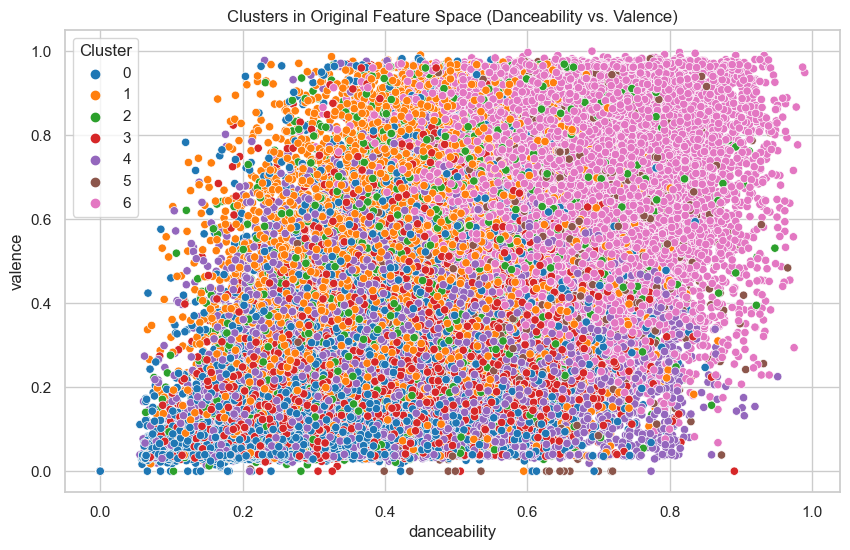

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_for_clustering, x="danceability", y="valence", hue="Cluster", palette="tab10")
plt.title("Clusters in Original Feature Space (Danceability vs. Valence)")
plt.show()

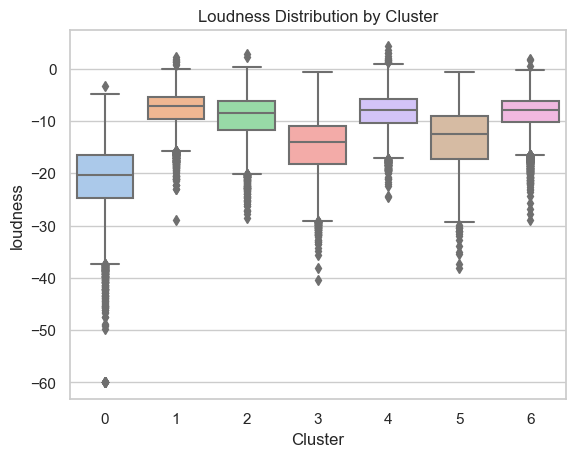

In [69]:
sns.boxplot(data=data_for_clustering, x="Cluster", y="loudness", palette="pastel")
plt.title("Loudness Distribution by Cluster")
plt.show()

In [75]:
data_for_clustering

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,instrumentalness,liveness,valence,tempo,time_signature,year,release_date,in_top_tracks,kmeans_cluster,Cluster
33823,6zeE5tKyr8Nu882DQhhSQI,Dust in the Wind,Point Of Know Return (Expanded Edition),6oU298pdPTCQnMx1PYwyUA,['Kansas'],['2hl0xAkS2AIRAu23TVMBG1'],7,1,False,0.475,...,0.000560,0.1100,0.387,93.503,4.0,1977,1977,1,6,3
56216,1ixbwbeBi5ufN4noUKmW5a,Paper Planes,Kala,2xoj2gYed3IYmGWn3owSfu,['M.I.A.'],['0QJIPDAEDILuo8AIq3pMuU'],11,1,False,0.447,...,0.000075,0.6500,0.485,172.253,4.0,2007,2007-08-20,1,4,2
92958,2Oycxb8QbPkpHTo8ZrmG0B,Prisoner (feat. Dua Lipa),Plastic Hearts,5BRhg6NSEZOj0BR6Iz56fR,"['Miley Cyrus', 'Dua Lipa']","['5YGY8feqx7naU7z4HrwZM6', '6M2wZ9GZgrQXHCFfjv...",4,1,False,0.781,...,0.000000,0.0761,0.595,127.990,4.0,2020,2020-11-27,1,2,6
193356,0P6AWOA4LG1XOctzaVu5tt,The Weekend - Funk Wav Remix,The Weekend (Funk Wav Remix),5enEsi887wD3qGoMCK4jLr,"['SZA', 'Calvin Harris', 'Funk Wav']","['7tYKF4w9nC0nq9CsPZTHyP', '7CajNmpbOovFoOoasH...",1,1,False,0.775,...,0.000000,0.1260,0.667,101.925,4.0,2017,2017-12-15,1,2,6
54523,53K3E0OXZRHLtuo1YScHRH,On The Highway - Remixed By Somegirl,Who Are The Skulls?,0NPwY9QogV2LueqpIkyEqC,['Red Flag'],['1m3xxj0iHUjur3yQjVvAD2'],9,1,False,0.553,...,0.010300,0.1020,0.412,103.998,4.0,2002,2002,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172714,2Cf4AJwd2IOWTmj9ec7xBJ,O Sacred Head Now Wounded,Say Amen: Hymns and Songs of Faith,4KJwLWXpXdKKctHmeXwdLO,['Ginny Owens'],['2mVoAGALkIviYCkBDNDKcn'],2,1,False,0.597,...,0.000000,0.1010,0.320,84.000,4.0,2009,2009-10-20,0,2,6
34181,6fcNqJAGlkhC2INWSLEEHn,"Piano Trio in B Flat Major, Op.97 'Archduke' (...",Beethoven: Piano Trios Opp.1 & 97 'Archduke',6daLKLKbhlbdjfHrTs2mDg,"['Pinchas Zukerman', 'Jacqueline du Pré', 'Dan...","['57J4DccKLul7z7kqfRPiER', '5VRErWhTZd0si1lqt1...",6,2,False,0.498,...,0.884000,0.1450,0.371,105.325,4.0,2001,2001,0,0,0
173089,2NWAFcJQSEVPF97JpInCax,"Keyboard Concerto in C Major, BWV 976 (arr. of...",J.S. Bach: The Transcriptions of Concertos by ...,0stQnhD7MslNVhbemTotPo,"['Johann Sebastian Bach', 'Sophie Yates']","['5aIqB5nVVvmFsvSdExz408', '5TTfNO5Yy62SfQKcr9...",13,1,False,0.367,...,0.027000,0.2950,0.960,102.595,4.0,2013,2013,0,2,3
21978,1047u8VWjogK7fy2jXZiME,"Symphony No. 7 in C Major, Hob. I:7 ""Le midi"":...","Haydn: Symphonies, Vol. 7",5iNnFK2lVNXiK7iGzOzn8f,"['Franz Joseph Haydn', 'Northern Chamber Orche...","['656RXuyw7CE0dtjdPgjJV6', '3lisojeQ5S43CK54Pm...",5,1,False,0.379,...,0.782000,0.0968,0.277,133.725,3.0,1994,1994-02-04,0,0,0


In [81]:
# List of columns to exclude
exclude_columns = ['year', 'track_number', 'disc_number', 'in_top_tracks', 'kmeans_cluster', 'Cluster']

# Select only numeric columns excluding specified ones
numeric_columns = [col for col in data_for_clustering.select_dtypes(include=['number']).columns if col not in exclude_columns]

# Group by Cluster and compute statistics for numeric columns
cluster_stats = data_for_clustering[numeric_columns].groupby(data_for_clustering["Cluster"]).agg(['count', 'mean', 'std'])

# Display the summary statistics
cluster_stats

danceability                        key                     loudness  \
               count      mean       std  count      mean       std    count   
Cluster                                                                        
0               8403  0.337302  0.156240   8403  4.975366  3.494885     8403   
1               7546  0.440271  0.129947   7546  5.259608  3.546163     7546   
2               3135  0.469737  0.154945   3135  5.193301  3.530741     3135   
3               8046  0.426429  0.146938   8046  5.092344  3.480254     8046   
4               7978  0.441148  0.162560   7978  5.282151  3.588839     7978   
5               1294  0.609886  0.129219   1294  5.435858  3.581789     1294   
6              13602  0.672039  0.109905  13602  5.345979  3.559176    13602   

                               mode  ...  liveness valence            \
              mean       std  count  ...       std   count      mean   
Cluster                              ...                               
0       -21.112472  6.656543   8403  ...  0.091576    8403  0.210861   
1        -7.739059  3.251492   7546  ...  0.106214    7546  0.502194   
2        -9.400201  4.499761   3135  ...  0.149360    3135  0.481112   
3       -15.012326  5.359302   8046  ...  0.087490    8046  0.281601   
4        -8.369348  3.390782   7978  ...  0.106946    7978  0.289873   
5       -13.487691  6.022635   1294  ...  0.271592    1294  0.515430   
6        -8.384445  3.191514  13602  ...  0.099736   13602  0.695809   

                   tempo                        time_signature            \
              std  count        mean        std          count      mean   
Cluster                                                                    
0        0.202369   8403  105.443792  31.544701           8403  3.675830   
1        0.222635   7546  161.209963  19.613037           7546  3.863769   
2        0.238697   3135  120.311144  28.311153           3135  3.880064   
3        0.178906   8046  105.056451  27.406540           8046  3.708302   
4        0.178140   7978  112.057117  22.832347           7978  3.882677   
5        0.236642   1294  108.349181  33.048261           1294  3.727202   
6        0.178600  13602  112.995606  19.455493          13602  3.954345   

                   
              std  
Cluster            
0        0.784957  
1        0.420160  
2        0.465430  
3        0.734854  
4        0.481862  
5        0.852956  
6        0.288322  

[7 rows x 33 columns]

In [101]:
# Define a mapping from cluster numbers to names
cluster_name_mapping = {
    0: "Lo-Fi Library",
    1: "High-Energy Hype",
    2: "Indie Chill",
    3: "Main Character Energy",
    4: "Groovy Funk",
    5: "Mystic & Moody",
    6: "Sunshine & Seratonin"
}

# Apply the mapping to the Cluster column
data_for_clustering["Cluster_Name"] = data_for_clustering["Cluster"].map(cluster_name_mapping)

# Display first few rows to verify
data_for_clustering[["id","name", "artists", "Cluster", "Cluster_Name","in_top_tracks"]].head()

,id,name,artists,Cluster,Cluster_Name,in_top_tracks
33823,6zeE5tKyr8Nu882DQhhSQI,Dust in the Wind,['Kansas'],3,Main Character Energy,1
56216,1ixbwbeBi5ufN4noUKmW5a,Paper Planes,['M.I.A.'],2,Indie Chill,1
92958,2Oycxb8QbPkpHTo8ZrmG0B,Prisoner (feat. Dua Lipa),"['Miley Cyrus', 'Dua Lipa']",6,Sunshine & Seratonin,1
193356,0P6AWOA4LG1XOctzaVu5tt,The Weekend - Funk Wav Remix,"['SZA', 'Calvin Harris', 'Funk Wav']",6,Sunshine & Seratonin,1
54523,53K3E0OXZRHLtuo1YScHRH,On The Highway - Remixed By Somegirl,['Red Flag'],6,Sunshine & Seratonin,0


In [107]:
print(data_for_clustering["in_top_tracks"].value_counts())  

in_top_tracks
0    50000
1        4
Name: count, dtype: int64


In [105]:
# Filter for top tracks
top_tracks = data_for_clustering[data_for_clustering["in_top_tracks"] == 1]

# Count occurrences of each Cluster_Name
top_clusters = top_tracks["Cluster_Name"].value_counts().reset_index()

# Rename columns for clarity
top_clusters.columns = ["Cluster_Name", "Count"]

# Display the result
print(top_clusters)

            Cluster_Name  Count
0   Sunshine & Seratonin      2
1  Main Character Energy      1
2            Indie Chill      1


In [92]:
def recommend_songs_based_on_favorites(data, favorite_moods, num_songs=10):
    """
    Recommend songs from the user's favorite mood clusters that they haven't heard yet.
    """
    recommendations = data[
        (data["Cluster"].isin(favorite_moods)) & (data["in_top_tracks"] == 0)
    ]
    
    if recommendations.empty:
        return "No new recommendations available in your favorite moods."

    return recommendations.sample(n=min(num_songs, len(recommendations)), random_state=42)[["name", "artists", "album", "Cluster"]]

# Example usage:
recommended_songs = recommend_songs_based_on_favorites(data_for_clustering, favorite_moods)
recommended_songs

,name,artists,album,Cluster
110113,I Saw Stars (feat. Stéphane Grappelli) - Remas...,"['Django Reinhardt', 'Quintette du Hot Club de...",Djangology (feat. Stéphane Grappelli),6
140086,Hip Hopcrisy,['Gunnar Biggs'],Footprint,3
81069,Hips,['Crash'],Crash for Safety,6
56283,The Sound of Settling,['Vitamin String Quartet'],VSQ Performs Death Cab for Cutie: Ghost,3
166348,Blessings,['Singh Kaur'],Crimson Collection Vol. 6 & 7,2
9481,Do Ya Swing,['Seven Foot Politic'],Ska The Third Wave: Volume 3,6
64624,Someday Baby,['Robert Lowery'],Rainin' Down Blues,6
133940,Timelines,['Sweatshop Union'],Water Street,6
107435,On My Own feat. Roy Davis Jr,['Fred Everything'],Lost Together,6
47003,Josquin: Missa Faysant regretz - 5c. Agnus Dei 3,"['Josquin des Prez', 'The Tallis Scholars', 'P...","Josquin Masses - Missa Hercules Dux Ferrarie, ...",3


In [97]:
def create_playlists_by_mood(recommended_songs):
    """
    Automatically groups songs into playlists by mood clusters.
    """
    grouped_playlists = recommended_songs.groupby("Cluster")

    for mood, group in grouped_playlists:
        playlist_name = f"Mood Playlist - Cluster {mood}"
        file_name = f"{playlist_name.replace(' ', '_')}.csv"
        
        group.to_csv(file_name, index=False)
        print(f"{playlist_name} saved as '{file_name}'")

# Example Usage
create_playlists_by_mood(recommended_songs)

Mood Playlist - Cluster 2 saved as 'Mood_Playlist_-_Cluster_2.csv'
Mood Playlist - Cluster 3 saved as 'Mood_Playlist_-_Cluster_3.csv'
Mood Playlist - Cluster 6 saved as 'Mood_Playlist_-_Cluster_6.csv'


# Recommendations

# Conclusion

# Ideas

1️⃣ Let Users Control Recommendation Filters
Instead of blindly recommending similar songs, let the user fine-tune the recommendations. ✅ Example Enhancements:

Genre Filtering: “Only recommend pop songs”
Energy Level: “Only recommend high-energy songs”
Release Year Constraint: “Recommend only songs from the 2010s”
💡 How to Implement:

python
Copy code
Example: Only recommend high-energy songs (energy > 0.7)
filtered_songs = data_for_clustering[(data_for_clustering['energy'] > 0.7) & (data_for_clustering.index.isin(top_matches))]
👉 This adds a personalization layer that Spotify doesn’t let users adjust!

Right now, your project is already unique because it uses clustering instead of collaborative filtering.
To differentiate it further, I recommend:

Let users control recommendations (filters like genre, energy, tempo).